In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-anomaly-detection/projet_deep_learing/projet_deeplearning.ipynb
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/README.txt~
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/README.txt
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/._README.txt
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/UCSDped1.m
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/._UCSDped1.m
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/UCSDped1.m~
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test001/079.tif
/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test001/084.tif
/kaggle/input/dataset-anomaly-detection/projet_deep_

In [2]:
#### import tensorflow as tf
import os
import cv2
import numpy as np

# Définir le chemin vers le dataset
dataset_path = '/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2'

# Chemins vers les sous-dossiers pour les jeux de données
paths = {
    'UCSDped1_Train': os.path.join(dataset_path, 'UCSDped1', 'Train'),
    'UCSDped1_Test': os.path.join(dataset_path, 'UCSDped1', 'Test'),
    'UCSDped2_Train': os.path.join(dataset_path, 'UCSDped2', 'Train'),
    'UCSDped2_Test': os.path.join(dataset_path, 'UCSDped2', 'Test')
}

In [3]:
# Fonction pour charger les chemins d'images depuis un dossier
def get_image_paths(folder_path):
    image_paths = []
    if not os.path.exists(folder_path):
        print(f"Chemin non trouvé : {folder_path}")
        return image_paths

    for subfolder in sorted(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):  # Vérifiez si c'est un dossier
            for filename in sorted(os.listdir(subfolder_path)):
                img_path = os.path.join(subfolder_path, filename)
                # Vérifie l'extension de fichier pour éviter les fichiers non image
                if img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif','tif')):
                    image_paths.append(img_path)
    return image_paths

# Récupérer tous les chemins d'images pour chaque dossier
train1_paths = get_image_paths(paths['UCSDped1_Train'])
test1_paths = get_image_paths(paths['UCSDped1_Test'])
train2_paths = get_image_paths(paths['UCSDped2_Train'])
test2_paths = get_image_paths(paths['UCSDped2_Test'])


In [4]:
from PIL import Image
import numpy as np

# Définir img_width et img_height si ce n'est pas encore fait
img_width = 128  # Remplacez par la largeur souhaitée
img_height = 128  # Remplacez par la hauteur souhaitée

def load_tif_image(file_path):
    print(f"Chargement de l'image : {file_path}")
    try:
        with Image.open(file_path) as img:
            img = img.convert("L")  # Convertir en niveaux de gris
            img = img.resize((img_width, img_height))  # Redimensionner
            img_array = np.array(img) / 255.0  # Normaliser
            return img_array
    except Exception as e:
        print(f"Erreur lors du chargement de l'image {file_path}: {e}")
        return None

In [5]:
# Fonction pour vérifier si un fichier est dans un dossier qui se termine par 'gt'
def is_gt_folder(image_path):
    # Extraire le dossier parent de l'image
    parent_folder = os.path.basename(os.path.dirname(image_path))
    
    # Vérifier si le nom du dossier parent se termine par 'gt'
    return parent_folder.endswith('gt')

In [6]:
# Chargez les images et filtrez celles qui sont None
train1_images = [load_tif_image(path) for path in train1_paths]
train1_images = [img for img in train1_images if img is not None]  # Filtrer les None

test1_images = [load_tif_image(path) for path in test1_paths if not is_gt_folder(path)]
test1_images = [img for img in test1_images if img is not None]  # Filtrer les None

Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/001.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/002.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/003.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/004.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/005.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/006.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/007.tif
Charge

PackBitsDecode: Not enough data for scanline 0.


Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/152.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/153.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/154.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/155.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/156.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/157.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/158.tif
Chargement de l'imag

In [7]:
# Chargez les images et filtrez celles qui sont None
train2_images = [load_tif_image(path) for path in train2_paths]
train2_images = [img for img in train1_images if img is not None]  # Filtrer les None

test2_images = [load_tif_image(path) for path in test2_paths if not is_gt_folder(path)]
test2_images = [img for img in test1_images if img is not None]  # Filtrer les None


Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/001.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/002.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/003.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/004.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/005.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/006.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/007.tif
Charge

In [8]:
def extract_anomaly_indices(m_file_path):
    """
    Fonction pour extraire les indices des anomalies à partir d'un fichier .m.

    :param m_file_path: Chemin vers le fichier .m
    :return: Liste des indices des anomalies
    """
    anomaly_indices = []

    try:
        with open(m_file_path, 'r') as file:
            content = file.readlines()

            # Parcourir chaque ligne pour extraire les indices
            for line in content:
                if 'gt_frame' in line:
                    # Extraire la plage d'indices, elle est dans le format [start:end] ou [start:end, start:end]
                    start_index = line.find('[') + 1
                    end_index = line.find(']')
                    if start_index != -1 and end_index != -1:
                        # Extraire et nettoyer la chaîne d'indices
                        frame_range = line[start_index:end_index].strip()

                        # Diviser les différentes plages d'indices si elles existent (séparées par une virgule)
                        ranges = frame_range.split(',')

                        # Liste pour stocker les indices extraits
                        indices = []

                        for r in ranges:
                            # Gérer la plage avec un format start:end
                            if ':' in r:
                                start, end = map(int, r.split(':'))
                                indices.extend(range(start, end + 1))  # Ajouter tous les indices dans la plage
                            else:
                                indices.append(int(r))  # Si c'est juste un indice, l'ajouter directement

                        # Ajouter les indices extraits à la liste principale
                        anomaly_indices.append(indices)

        return anomaly_indices

    except Exception as e:
        print(f"Erreur lors de l'ouverture du fichier : {e}")
        return []

# Chemins vers les fichiers .m
m_file_path_ped1 = os.path.join(paths['UCSDped1_Test'], 'UCSDped1.m')
m_file_path_ped2 = os.path.join(paths['UCSDped2_Test'], 'UCSDped2.m')

# Extraire les indices d'anomalies pour UCSDped1_Test et UCSDped2_Test
anomaly_indices_ped1 = extract_anomaly_indices(m_file_path_ped1)
anomaly_indices_ped2 = extract_anomaly_indices(m_file_path_ped2)




In [9]:
def adjust_indices_per_sublist(indices):
    """
    Fonction pour ajuster les indices par sous-liste en ajoutant 200 après chaque sous-liste.
    :param indices: Liste d'indices sous forme de sous-listes (par exemple, [60, 61, 62, ...] ou [(start, end)]).
    :return: Liste des indices ajustés.
    """
    adjusted_indices = []
    current_offset = 0  # Décalage initial des indices

    for sublist in indices:
        # Si les éléments de la sous-liste sont des tuples (start, end)
        if isinstance(sublist[0], tuple):
            for start, end in sublist:
                adjusted_sublist = list(range(start + current_offset, end + current_offset + 1))
                adjusted_indices.extend(adjusted_sublist)
        else:
            # Sinon, on applique simplement l'offset à chaque élément
            adjusted_sublist = [index + current_offset for index in sublist]
            adjusted_indices.extend(adjusted_sublist)

        # Augmenter le décalage de 200 après chaque sous-liste
        current_offset += 200

    return adjusted_indices


# Appliquez l'ajustement
adjusted_indices = adjust_indices_per_sublist(anomaly_indices_ped1)

# Affichez les indices ajustés
print(adjusted_indices)


[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,

In [43]:
len(adjusted_indices)

4045

In [10]:
import torch
from torch import nn

class VAE(nn.Module):
    def __init__(self, in_channels=1, latent_dim=512, dropout_prob=0.1):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),
        )

        # Calculer la taille de sortie de l'encodeur
        sample_input = torch.randn(1, in_channels, 128, 128)
        output_features = self.encoder(sample_input).view(1, -1).shape[1]
        
        # Couches linéaires pour mu et logvar
        self.fc_mu = nn.Linear(output_features, latent_dim)
        self.fc_logvar = nn.Linear(output_features, latent_dim)

        # Décodeur linéaire
        self.fc_decode = nn.Linear(latent_dim, output_features)

        # Décodeur convolutif
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(dropout_prob),

            nn.ConvTranspose2d(64, in_channels, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),  # Normalisation entre 0 et 1
        )

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(h.size(0), -1)  # Flatten
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.fc_decode(z)
        h = h.view(h.size(0), 1024, 4, 4)  # Ajustement pour le décodeur
        return self.decoder(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


In [16]:
import pickle
import torch
import io

# Chemin vers le modèle enregistré
model_path = '/kaggle/input/vaefinallllll/keras/default/1/VAE_lastversionarch2.pkl'

# Définir une classe pour personnaliser la désérialisation
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            # Charger les données sur le CPU
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            # Comportement normal pour les autres classes
            return super().find_class(module, name)

# Charger le modèle en utilisant la classe personnalisée
with open(model_path, 'rb') as f:
    vae = CPU_Unpickler(f).load()

# Maintenant le modèle est chargé sur le CPU


/tmp/ipykernel_30/2725090586.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return lambda b: torch.load(io.BytesIO(b), map_location='cpu')


In [17]:
import torch
import torch.nn as nn
from torchvision import transforms  # Assurez-vous d'importer transforms
import numpy as np

transform = transforms.Compose([
         transforms.Resize((128, 128)),
    #transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np

# Définition de la classe CustomDataset
class CustomDataset(Dataset):
    def __init__(self, images_tensor, transform=None):
        self.images_tensor = images_tensor
        self.transform = transform

    def __len__(self):
        return len(self.images_tensor)

    def __getitem__(self, idx):
        image = self.images_tensor[idx]  # Obtenir l'image
        if self.transform:
            image = self.transform(image)  # Appliquer les transformations si définies
        return image

In [22]:
test_images_tensor = torch.tensor(test1_images).unsqueeze(1).float()  # Ajouter un canal et convertir en float32
# Créer l'instance de votre dataset
custom_test_dataset = CustomDataset(test_images_tensor, transform=transform)

/tmp/ipykernel_30/1511042077.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  test_images_tensor = torch.tensor(test1_images).unsqueeze(1).float()  # Ajouter un canal et convertir en float32


In [36]:
# Créer les DataLoaders pour l'entraînement et la validation
test_dataloader = DataLoader(
   custom_test_dataset,
    batch_size=128,
    shuffle=True,  # Mélanger les données d'entraînement
    num_workers=4  # Ajustez en fonction de votre système
)

Perte moyenne de reconstruction sur l'ensemble de test : 15446.1608
Perte totale de test (avec KL) : 16017.7399
Perte KL moyenne : 571.5791


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


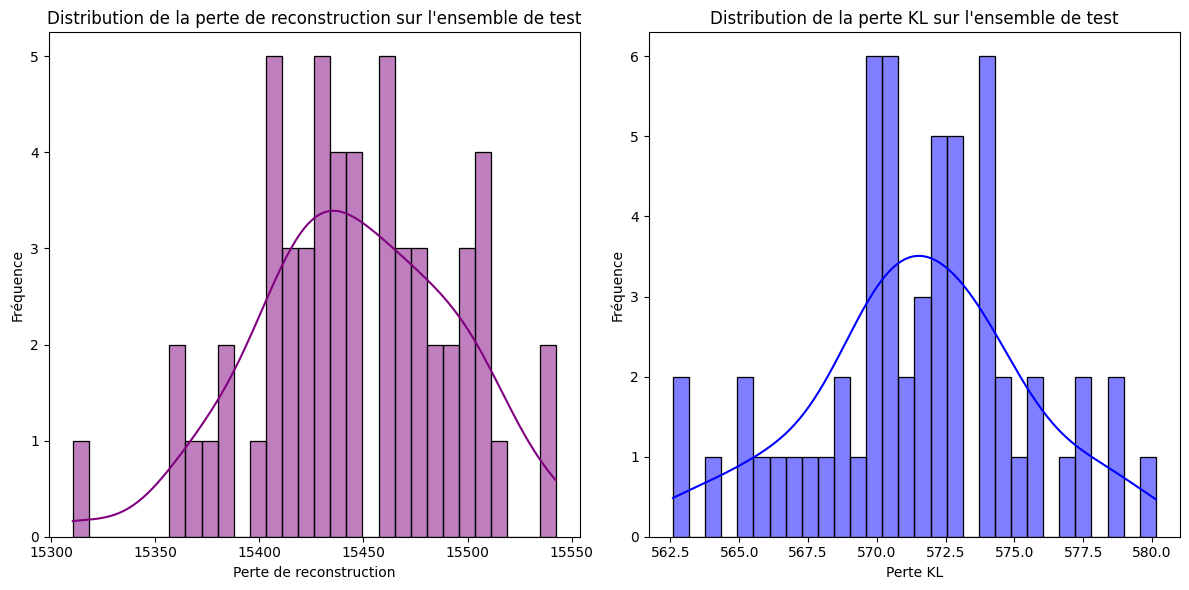

In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vae.eval()  # Mettre le modèle en mode évaluation
total_test_loss = 0
total_reconstruction_loss = 0
total_kl_loss = 0
test_reconstruction_losses = []  # Pour enregistrer les pertes de reconstruction individuelles
test_kl_losses = []  # Pour enregistrer les pertes KL individuelles

with torch.no_grad():  # Pas de calcul des gradients pendant le test
    for batch in test_dataloader:
        images = batch.to(device)

        # Forward pass : calcul de la reconstruction et des paramètres latents
        reconstructed, mu, log_var = vae(images)
        reconstructed_resized = F.interpolate(reconstructed, size=images.shape[2:], mode='bilinear', align_corners=False)

        # Calcul de la perte de reconstruction (réduction sur la somme des pixels de l'image pour tout le batch)
        reconstruction_loss = F.mse_loss(reconstructed_resized, images, reduction="none")
        reconstruction_loss = reconstruction_loss.view(reconstruction_loss.size(0), -1).sum(dim=1)  # Somme par image

        # Calcul de la KL divergence pour tout le batch
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp(), dim=1)  # Somme pour chaque image dans le batch

        # Ajouter les pertes calculées au total
        total_loss = reconstruction_loss + kl_divergence
        total_test_loss += total_loss.sum().item()  # Somme sur le batch entier
        total_reconstruction_loss += reconstruction_loss.sum().item()
        total_kl_loss += kl_divergence.sum().item()

        # Stocker les pertes de reconstruction et KL pour la visualisation
        test_reconstruction_losses.append(reconstruction_loss.mean().item())  # Moyenne par image
        test_kl_losses.append(kl_divergence.mean().item())  # Moyenne par image

# Calcul de la perte moyenne par image
avg_test_loss = total_test_loss / len(test_dataloader.dataset)
avg_reconstruction_loss = total_reconstruction_loss / len(test_dataloader.dataset)
avg_kl_loss = total_kl_loss / len(test_dataloader.dataset)

print(f"Perte moyenne de reconstruction sur l'ensemble de test : {avg_reconstruction_loss:.4f}")
print(f"Perte totale de test (avec KL) : {avg_test_loss:.4f}")
print(f"Perte KL moyenne : {avg_kl_loss:.4f}")

# Visualisation de la distribution des pertes
plt.figure(figsize=(12, 6))

# Distribution des pertes de reconstruction
plt.subplot(1, 2, 1)
sns.histplot(test_reconstruction_losses, kde=True, bins=30, color='purple')
plt.title('Distribution de la perte de reconstruction sur l\'ensemble de test')
plt.xlabel('Perte de reconstruction')
plt.ylabel('Fréquence')

# Distribution des pertes KL
plt.subplot(1, 2, 2)
sns.histplot(test_kl_losses, kde=True, bins=30, color='blue')
plt.title('Distribution de la perte KL sur l\'ensemble de test')
plt.xlabel('Perte KL')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


In [45]:
# Seuil déterminé à partir de l'historique de perte d'entraînement
threshold = 55  # Par exemple, vous avez déterminé ce seuil pendant l'entraînement.
beta=3
# Mode évaluation
vae.eval()  # Passer le modèle en mode évaluation

# Liste pour enregistrer les anomalies
anomalies = []

# Désactiver le calcul des gradients pendant l'évaluation
with torch.no_grad():
    for batch in test_dataloader:  # Utiliser le test_dataloader pour le test
        images = batch  # Chargement des images dans le batch
        images = images.to(device)  # Assurez-vous que les images et le modèle sont sur le même appareil
        
        # Forward pass : calcul de la reconstruction et des paramètres latents
        reconstructed, mu, log_var = vae(images)
        reconstructed_resized = F.interpolate(reconstructed, size=images.shape[2:], mode='bilinear', align_corners=False)

        # Calcul de la perte de reconstruction
        reconstruction_loss = F.mse_loss(reconstructed_resized, images, reduction="sum")

        # Calcul de la KL divergence
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        # Perte totale
        total_loss = reconstruction_loss + beta * kl_divergence
        
        # Comparer la perte totale avec le seuil
        if total_loss.item() > threshold:
            anomalies.append(images)  # Ajouter l'image au tableau des anomalies si la perte dépasse le seuil

# Affichage du nombre d'anomalies détectées
print(f"Nombre d'anomalies détectées : {len(anomalies)}")


Nombre d'anomalies détectées : 57


Nombre d'anomalies détectées : 3599


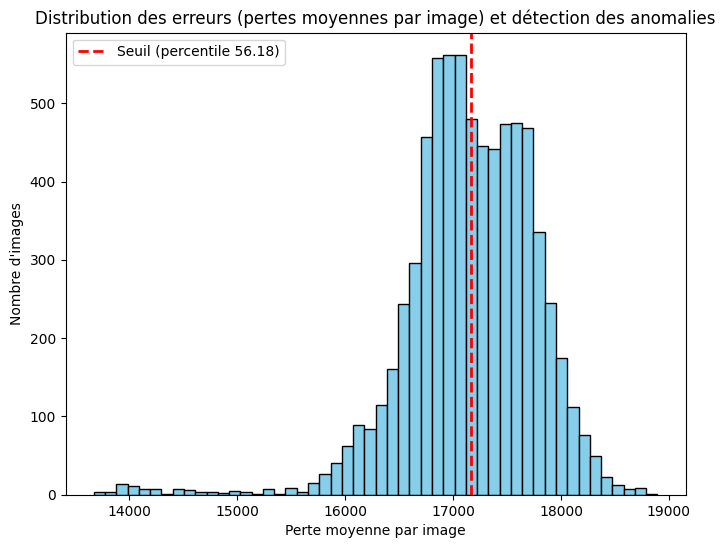

Évaluation terminée.


In [70]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Liste pour enregistrer les pertes par image
total_losses = []
beta = 3  # Paramètre pour la régularisation de la divergence KL
threshold = None  # Initialisation du seuil
anomalies = []

# Mode évaluation
vae.eval()  # Passer le modèle en mode évaluation

# Désactiver le calcul des gradients pendant l'évaluation
with torch.no_grad():
    # Parcours de tous les batches
    for batch in test_dataloader:
        images = batch  # Chargement des images dans le batch
        images = images.to(device)  # Assurez-vous que les images et le modèle sont sur le même appareil
        
        # Forward pass : calcul de la reconstruction et des paramètres latents
        reconstructed, mu, log_var = vae(images)
        reconstructed_resized = F.interpolate(reconstructed, size=images.shape[2:], mode='bilinear', align_corners=False)

        # Calcul de la perte de reconstruction par pixel (perte par image)
        reconstruction_loss = F.mse_loss(reconstructed_resized, images, reduction="none")  # "none" pour la perte par pixel

        # Calcul de la KL divergence
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp(), dim=1)  # Calcul pour chaque image

        # Calcul de la perte totale par image
        loss_per_image = reconstruction_loss.sum(dim=(1, 2, 3)) + beta * kl_divergence  # Somme des pertes par image

        # Ajouter les pertes par image à la liste
        total_losses.extend(loss_per_image.cpu().numpy())

    # Calcul du seuil basé sur le taux d'erreur dans le dataset (0.5618 = 56.18% percentile)
    threshold = torch.tensor(total_losses).quantile(0.5).item()

    # Détection des anomalies
    anomalies = [i for i, loss in enumerate(total_losses) if loss > threshold]  # Détection des anomalies
    print(f"Nombre d'anomalies détectées : {len(anomalies)}")

    # Affichage de la distribution des erreurs
    plt.figure(figsize=(8, 6))
    plt.hist(total_losses, bins=50, color='skyblue', edgecolor='black')
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Seuil (percentile 56.18)')
    plt.title('Distribution des erreurs (pertes moyennes par image) et détection des anomalies')
    plt.xlabel('Perte moyenne par image')
    plt.ylabel('Nombre d\'images')
    plt.legend()
    plt.show()

print("Évaluation terminée.")


Nombre d'anomalies détectées : 4440


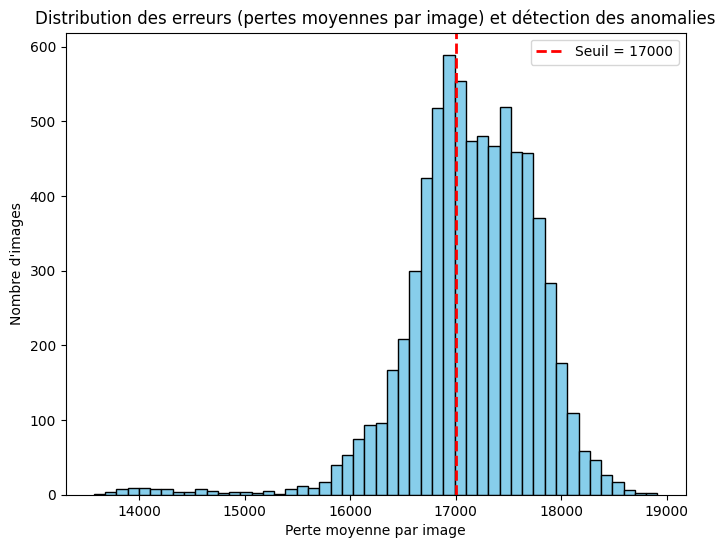

Évaluation terminée.


In [72]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Liste pour enregistrer les pertes par image
total_losses = []
beta = 3  # Paramètre pour la régularisation de la divergence KL
threshold = 17000  # Seuil fixe à 17000
anomalies = []

# Mode évaluation
vae.eval()  # Passer le modèle en mode évaluation

# Désactiver le calcul des gradients pendant l'évaluation
with torch.no_grad():
    # Parcours de tous les batches
    for batch in test_dataloader:
        images = batch  # Chargement des images dans le batch
        images = images.to(device)  # Assurez-vous que les images et le modèle sont sur le même appareil
        
        # Forward pass : calcul de la reconstruction et des paramètres latents
        reconstructed, mu, log_var = vae(images)
        reconstructed_resized = F.interpolate(reconstructed, size=images.shape[2:], mode='bilinear', align_corners=False)

        # Calcul de la perte de reconstruction par pixel (perte par image)
        reconstruction_loss = F.mse_loss(reconstructed_resized, images, reduction="none")  # "none" pour la perte par pixel

        # Calcul de la KL divergence
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp(), dim=1)  # Calcul pour chaque image

        # Calcul de la perte totale par image
        loss_per_image = reconstruction_loss.sum(dim=(1, 2, 3)) + beta * kl_divergence  # Somme des pertes par image

        # Ajouter les pertes par image à la liste
        total_losses.extend(loss_per_image.cpu().numpy())

    # Détection des anomalies en fonction du seuil fixé à 17000
    anomalies = [i for i, loss in enumerate(total_losses) if loss > threshold]  # Détection des anomalies
    print(f"Nombre d'anomalies détectées : {len(anomalies)}")

    # Affichage de la distribution des erreurs
    plt.figure(figsize=(8, 6))
    plt.hist(total_losses, bins=50, color='skyblue', edgecolor='black')
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Seuil = {threshold}')
    plt.title('Distribution des erreurs (pertes moyennes par image) et détection des anomalies')
    plt.xlabel('Perte moyenne par image')
    plt.ylabel('Nombre d\'images')
    plt.legend()
    plt.show()

print("Évaluation terminée.")


In [67]:
len(total_losses)

7199

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(detected_indices, adjusted_indices):
    """
    Calcule l'accuracy, la précision, le rappel et le F1 score pour la détection des anomalies.
    
    Args:
        detected_indices (list or numpy array): indices des anomalies détectées par le modèle.
        adjusted_indices (list or numpy array): indices des anomalies réelles (ground truth).
    
    Returns:
        dict: Un dictionnaire contenant l'accuracy, la précision, le rappel et le F1 score.
    """
    # Convertir les indices en sets pour faire la comparaison
    detected_set = set(detected_indices)
    adjusted_set = set(adjusted_indices)
    
    # True Positives (TP) : les indices détectés qui sont dans les indices réels
    true_positives = len(detected_set.intersection(adjusted_set))
    
    # False Positives (FP) : les indices détectés qui ne sont pas dans les indices réels
    false_positives = len(detected_set - adjusted_set)
    
    # False Negatives (FN) : les indices réels qui ne sont pas détectés par le modèle
    false_negatives = len(adjusted_set - detected_set)
    
    # True Negatives (TN) : les indices qui ne sont ni détectés ni réels (non utilisé ici mais pour la compréhension)
    # true_negatives = len(non_detected_set - adjusted_set)  # Peut être calculé si nécessaire, mais non utilisé ici.
    
    # Calcul de l'accuracy
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0.0
    
    # Calcul de la précision (precision)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
    
    # Calcul du rappel (recall)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
    
    # Calcul du F1 score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


metrics = calculate_metrics(anomalies, adjusted_indices)

# Affichage des résultats
print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1 Score: {metrics['f1_score']:.2f}")

Accuracy: 0.41
Precision: 0.56
Recall: 0.61
F1 Score: 0.59


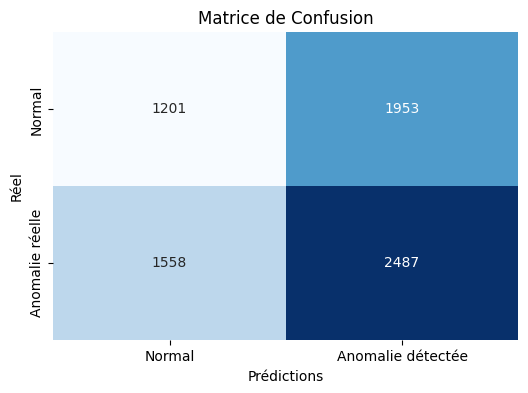

In [75]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(detected_indices, adjusted_indices, total_samples):
    """
    Affiche la matrice de confusion pour la détection des anomalies.

    Args:
        detected_indices (list or numpy array): indices des anomalies détectées par le modèle.
        adjusted_indices (list or numpy array): indices des anomalies réelles (ground truth).
        total_samples (int): nombre total d'échantillons dans le jeu de données.
    """
    # Créer des labels binaires pour toutes les images
    y_true = np.zeros(total_samples)
    y_pred = np.zeros(total_samples)

    # Marquer les indices des anomalies réelles comme 1 dans y_true
    y_true[adjusted_indices] = 1

    # Marquer les indices des anomalies détectées comme 1 dans y_pred
    y_pred[detected_indices] = 1

    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)

    # Affichage de la matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Normal', 'Anomalie détectée'],
                yticklabels=['Normal', 'Anomalie réelle'])
    plt.xlabel('Prédictions')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion')
    plt.show()

# Exemple d'utilisation avec le nombre total d'échantillons dans le jeu de données de test
total_samples = len(test_dataloader.dataset)  # Ajustez cette ligne pour correspondre à votre dataset

# Affichage de la matrice de confusion
plot_confusion_matrix(anomalies, adjusted_indices, total_samples)
